In [1]:
import sys,time
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
import numpy as np
# import data handling class
from DT5550_Waveform import *
from IPython import display

In [2]:
filename = '../../DT5550_DAQ/daq/ReadoutClient/waveform.raw'

next event ......


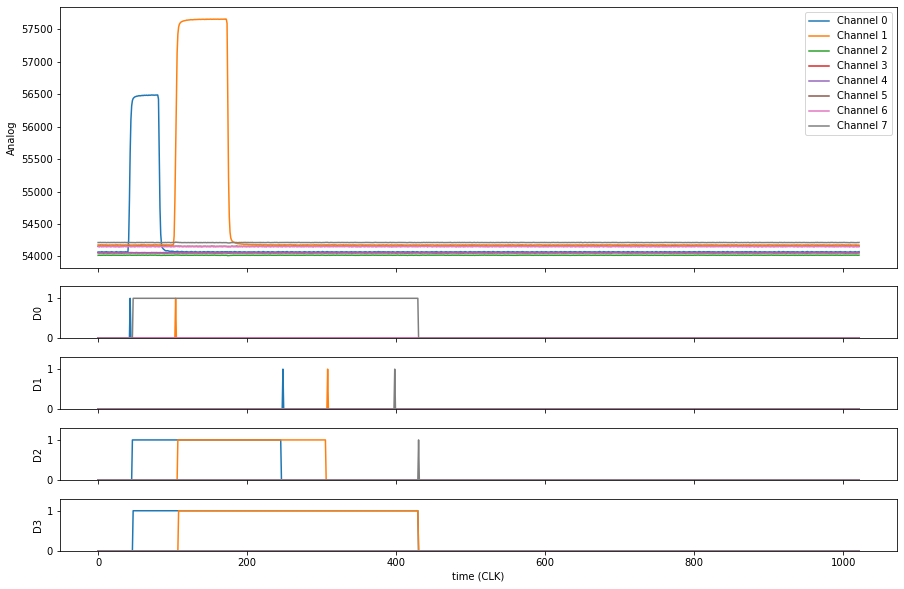

In [ ]:
#
# open the datfile
#
print('Open datafile:',filename)
waves = DT5550_Waveform(file=filename)
while (waves.read_event() != -1):
    #
    # plot the waveform
    #
    fig = waves.plot_waveform()    
    #
    # wait for input......
    #
    istat = int(input("Type: 0 to continue, 1 to make pdf, 2 to quit...."))

    if istat==0:
        print("continue......")
        display.clear_output(wait=True)
    elif istat==1:
        fname = 'event.pdf'
        print("save figure as:",fname)
        fig.savefig(fname)
        display.clear_output(wait=True)
    else:
        break

    print('next event ......')

In [4]:
#